In [21]:
%matplotlib inline
from __future__ import print_function, division

import xarray as xr
import glob
import sys
sys.path.append("../")
import TBFunctions as TB
from Clusteralgorithm import cluster_algorithm
import matplotlib.pyplot as plt
import danplotlib as dpl
import root_pandas as rp
import numpy as np
reload(TB)
import gc_colors
from itertools import cycle
gc_colors.update_colorcycle()

Updated matplotlib colorcycle to ['gcblue', 'gcred', 'gcgreen', 'gcorange', 'gccyan', 'gcmagenta', 'gcbrown', 'gcdarkgrey']


# Scan vs. run num

In [60]:
basepath = "/auto/sigma0/berninghoff/Analyses/Testbeam-Analysis/TB_Aug2017/Trackhits"
algo = "Default"

BXsel = 3
FTsel = range(12,17)
Chsel = range(3,20)+range(30,47)

for chip in ["PACIFIC"]:
    print(chip)
    if chip == "SPIROC":
        BXsel = 0
        FTsel = 0
        Chsel = [Ch+320 for Ch in Chsel]
    for layer in [0,1]:
        print("Layer {}".format(layer))
        path = "{}/{}/Layer_{}".format(basepath,chip,layer)
        for File in glob.glob("{}/*.nc".format(path)):
            run_nums = []
            effs = []
            ds = xr.open_dataset(File, algo)
            for run_num, group in ds.groupby("Run_num"):
                run_nums.append(run_num)
                sumds = group.sel(BX=BXsel, FT=FTsel, Ch=Chsel).sum()
                print(sumds["Trackhits_found"].item())
                print(type(sumds["Trackhits_found"].item()))
                eff = sumds["Trackhits_found"]/sumds["Trackhits_total"]
                effs.append(float(eff))
                
                raise ValueError
            
            dpl.plot(run_nums, effs, "x")
            plt.title(File)
            plt.show()
            plt.close()

PACIFIC
Layer 0
2056
<type 'int'>


ValueError: 

# Finetiming scan over all BXs

PACIFIC
Layer 0
<xarray.DataArray 'BX' (BX_FT: 320)>
array([-2, -2, -2, ...,  7,  7,  7])
Coordinates:
  * BX_FT    (BX_FT) MultiIndex
  - BX       (BX_FT) int64 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 ...
  - FT       (BX_FT) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Create new figure with sizes (16, 10)
2
2
2
2


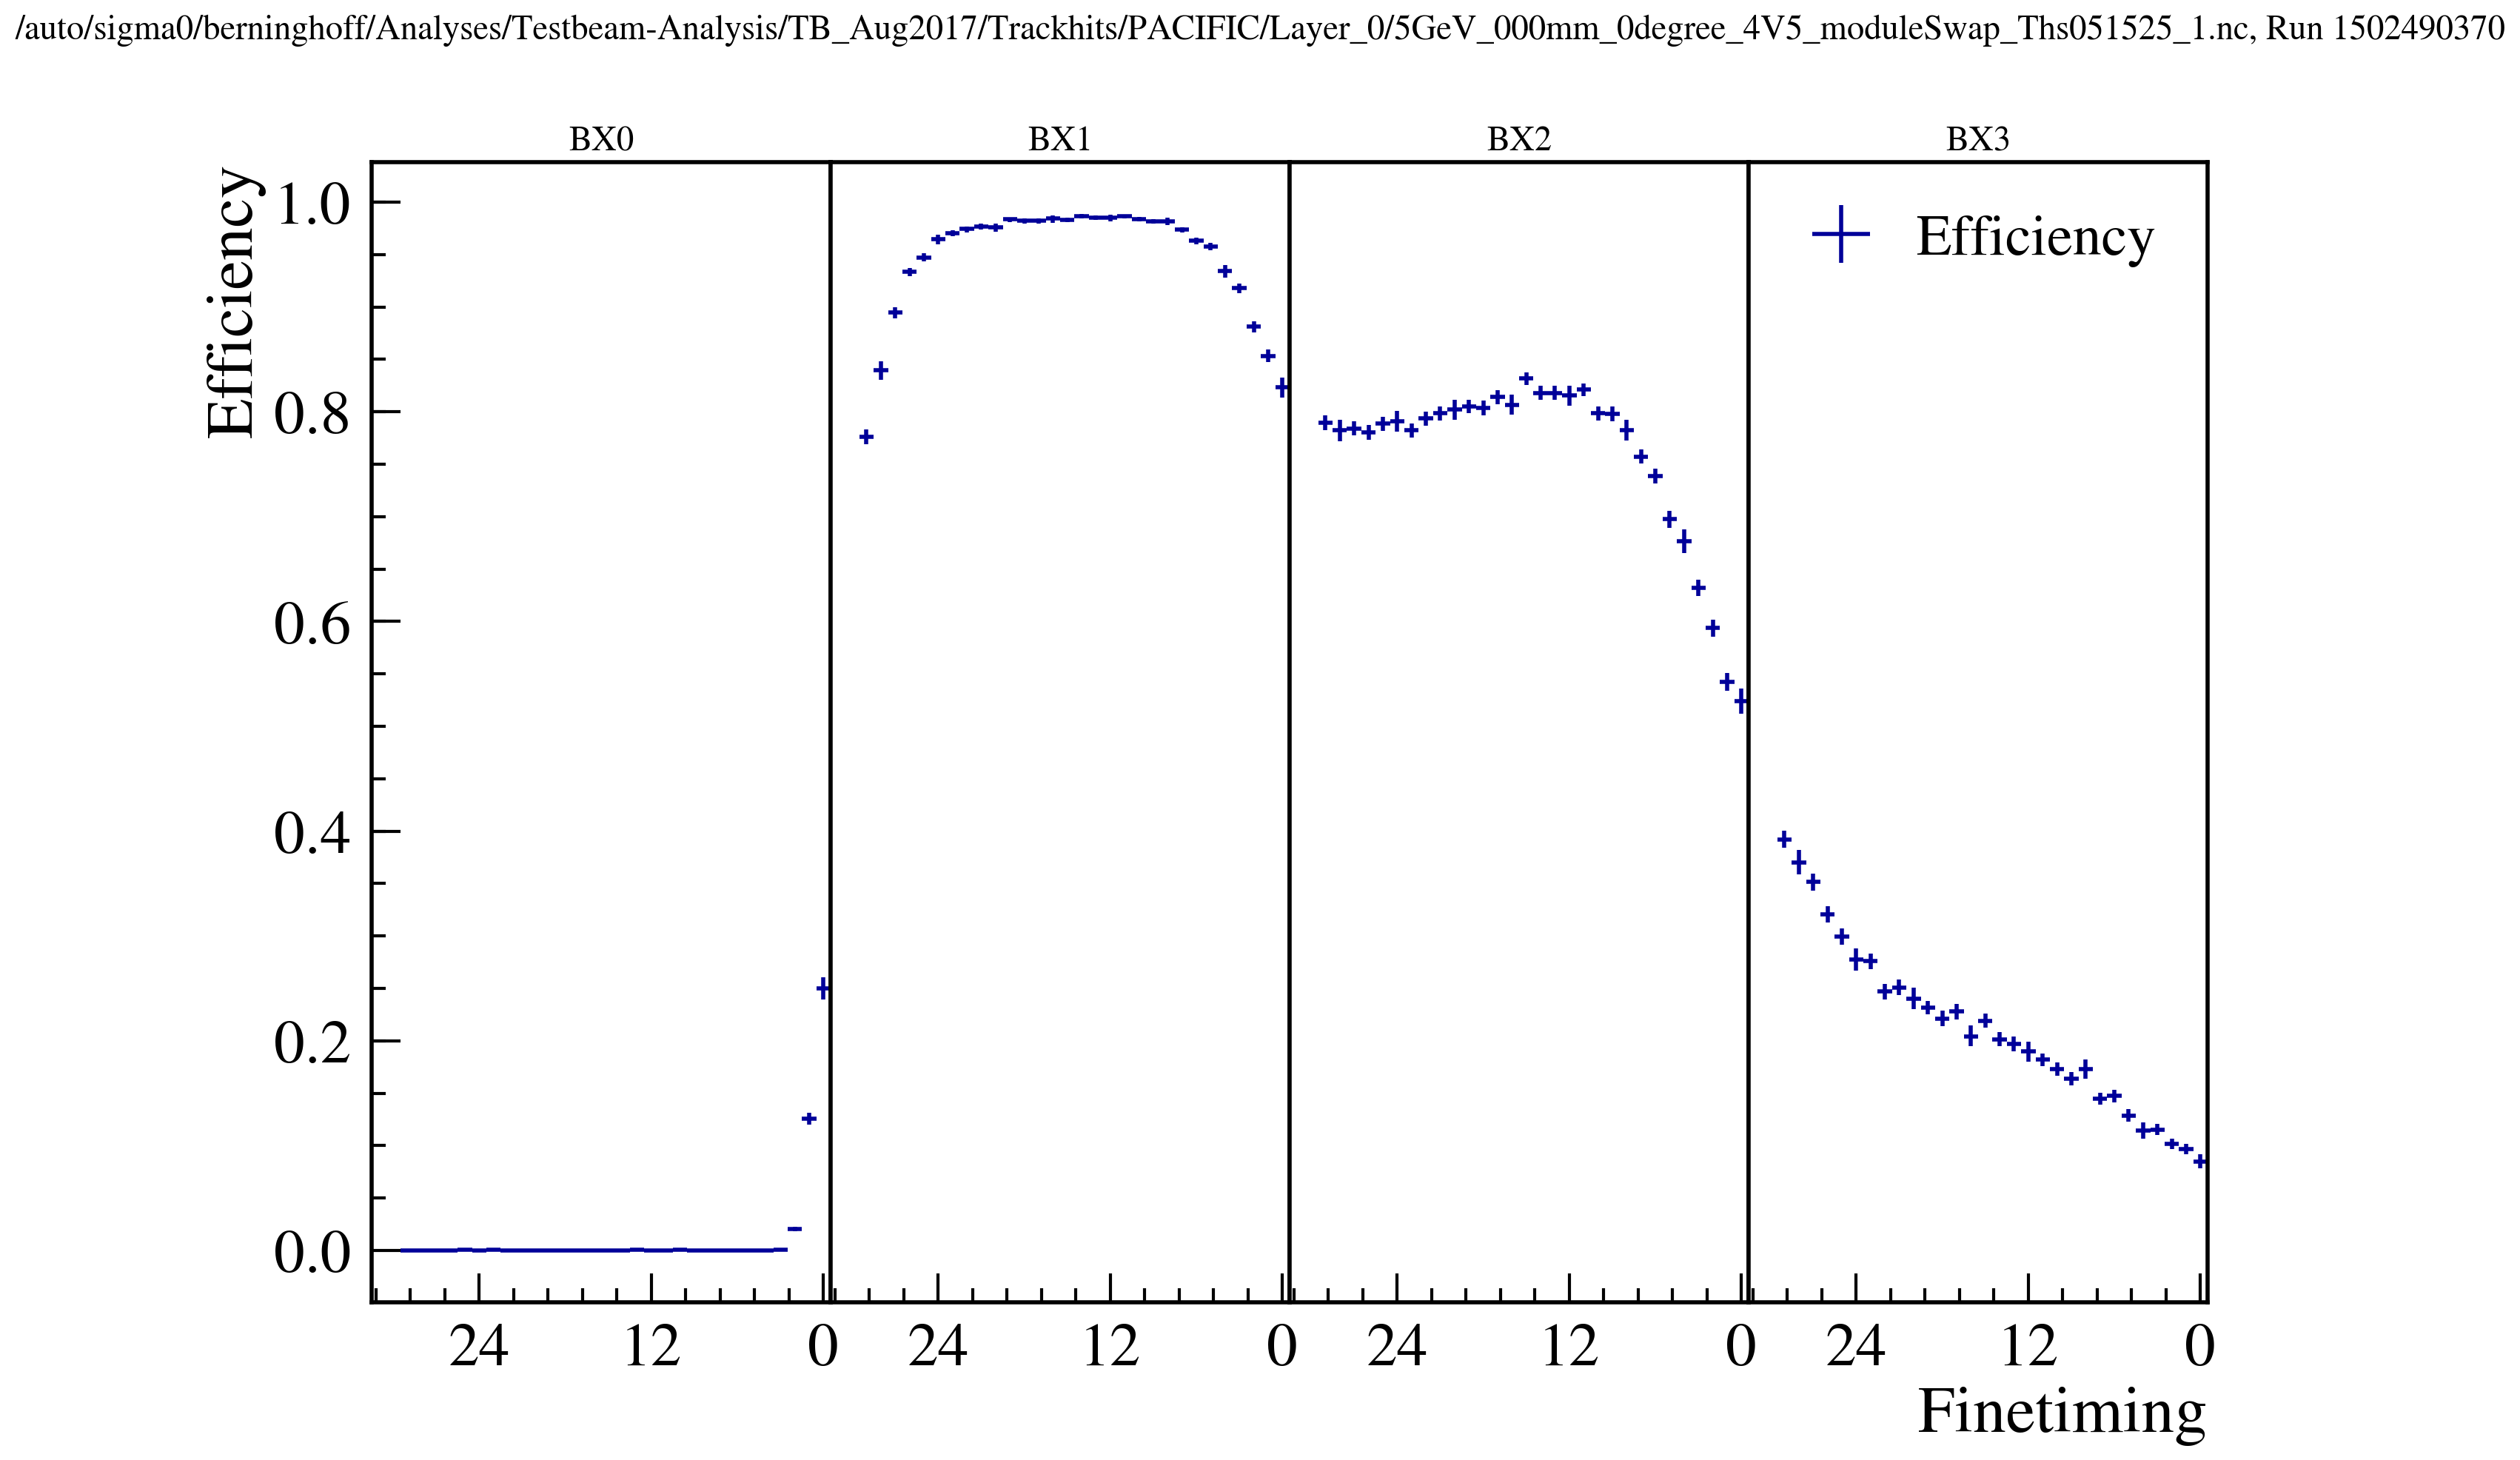

ValueError: 

In [47]:
basepath = "/auto/sigma0/berninghoff/Analyses/Testbeam-Analysis/TB_Aug2017/Trackhits"
algo = "Default"

BXs = range(-2, 8)
Chsel = range(3,20)+range(30,47)

for chip in ["PACIFIC"]:
    print(chip)
    if chip == "SPIROC":
        BXsel = 0
        FTsel = 0
        Chsel = [Ch+320 for Ch in Chsel]
    for layer in [0,1]:
        print("Layer {}".format(layer))
        path = "{}/{}/Layer_{}".format(basepath,chip,layer)
        for File in glob.glob("{}/*.nc".format(path)):
            ds = xr.open_dataset(File, algo)
            
            #Select specific channels
            ds_sel = ds.sel(Ch=Chsel)
            #Select sum over left over channels and run nums
            ds_sum = ds_sel.sum(["Ch", "Run_num"])
            
            #Flatten
            flat = ds_sum.stack(BX_FT=("BX", "FT"))
            print(flat["BX"])

            #Convert to (flatten) pandas dataframe
            #DF = group.to_dataframe()
                               
                


            eff, eff_errlow, eff_errup = TB.calc_TEfficiency(flat["Trackhits_found"], 
                                                             flat["Trackhits_total"])
            BX_arr = flat["BX"]
            FT_arr = flat["FT"]
            FT_arr += -2

            fig, axes = TB.finetimingplot(BX_arr, FT_arr, eff, yerr=[eff_errlow, eff_errup], BXs=[0,1,2,3],
                                         label="Efficiency")
            fig.suptitle("{}, Run {}".format(File, run_num))
            axes[0].set_ylabel("Efficiency")
            axes[-1].set_xlabel("Finetiming")
            axes[-1].legend()

            plt.show()
            plt.close()

            raise ValueError

# Efficiency vs. channels

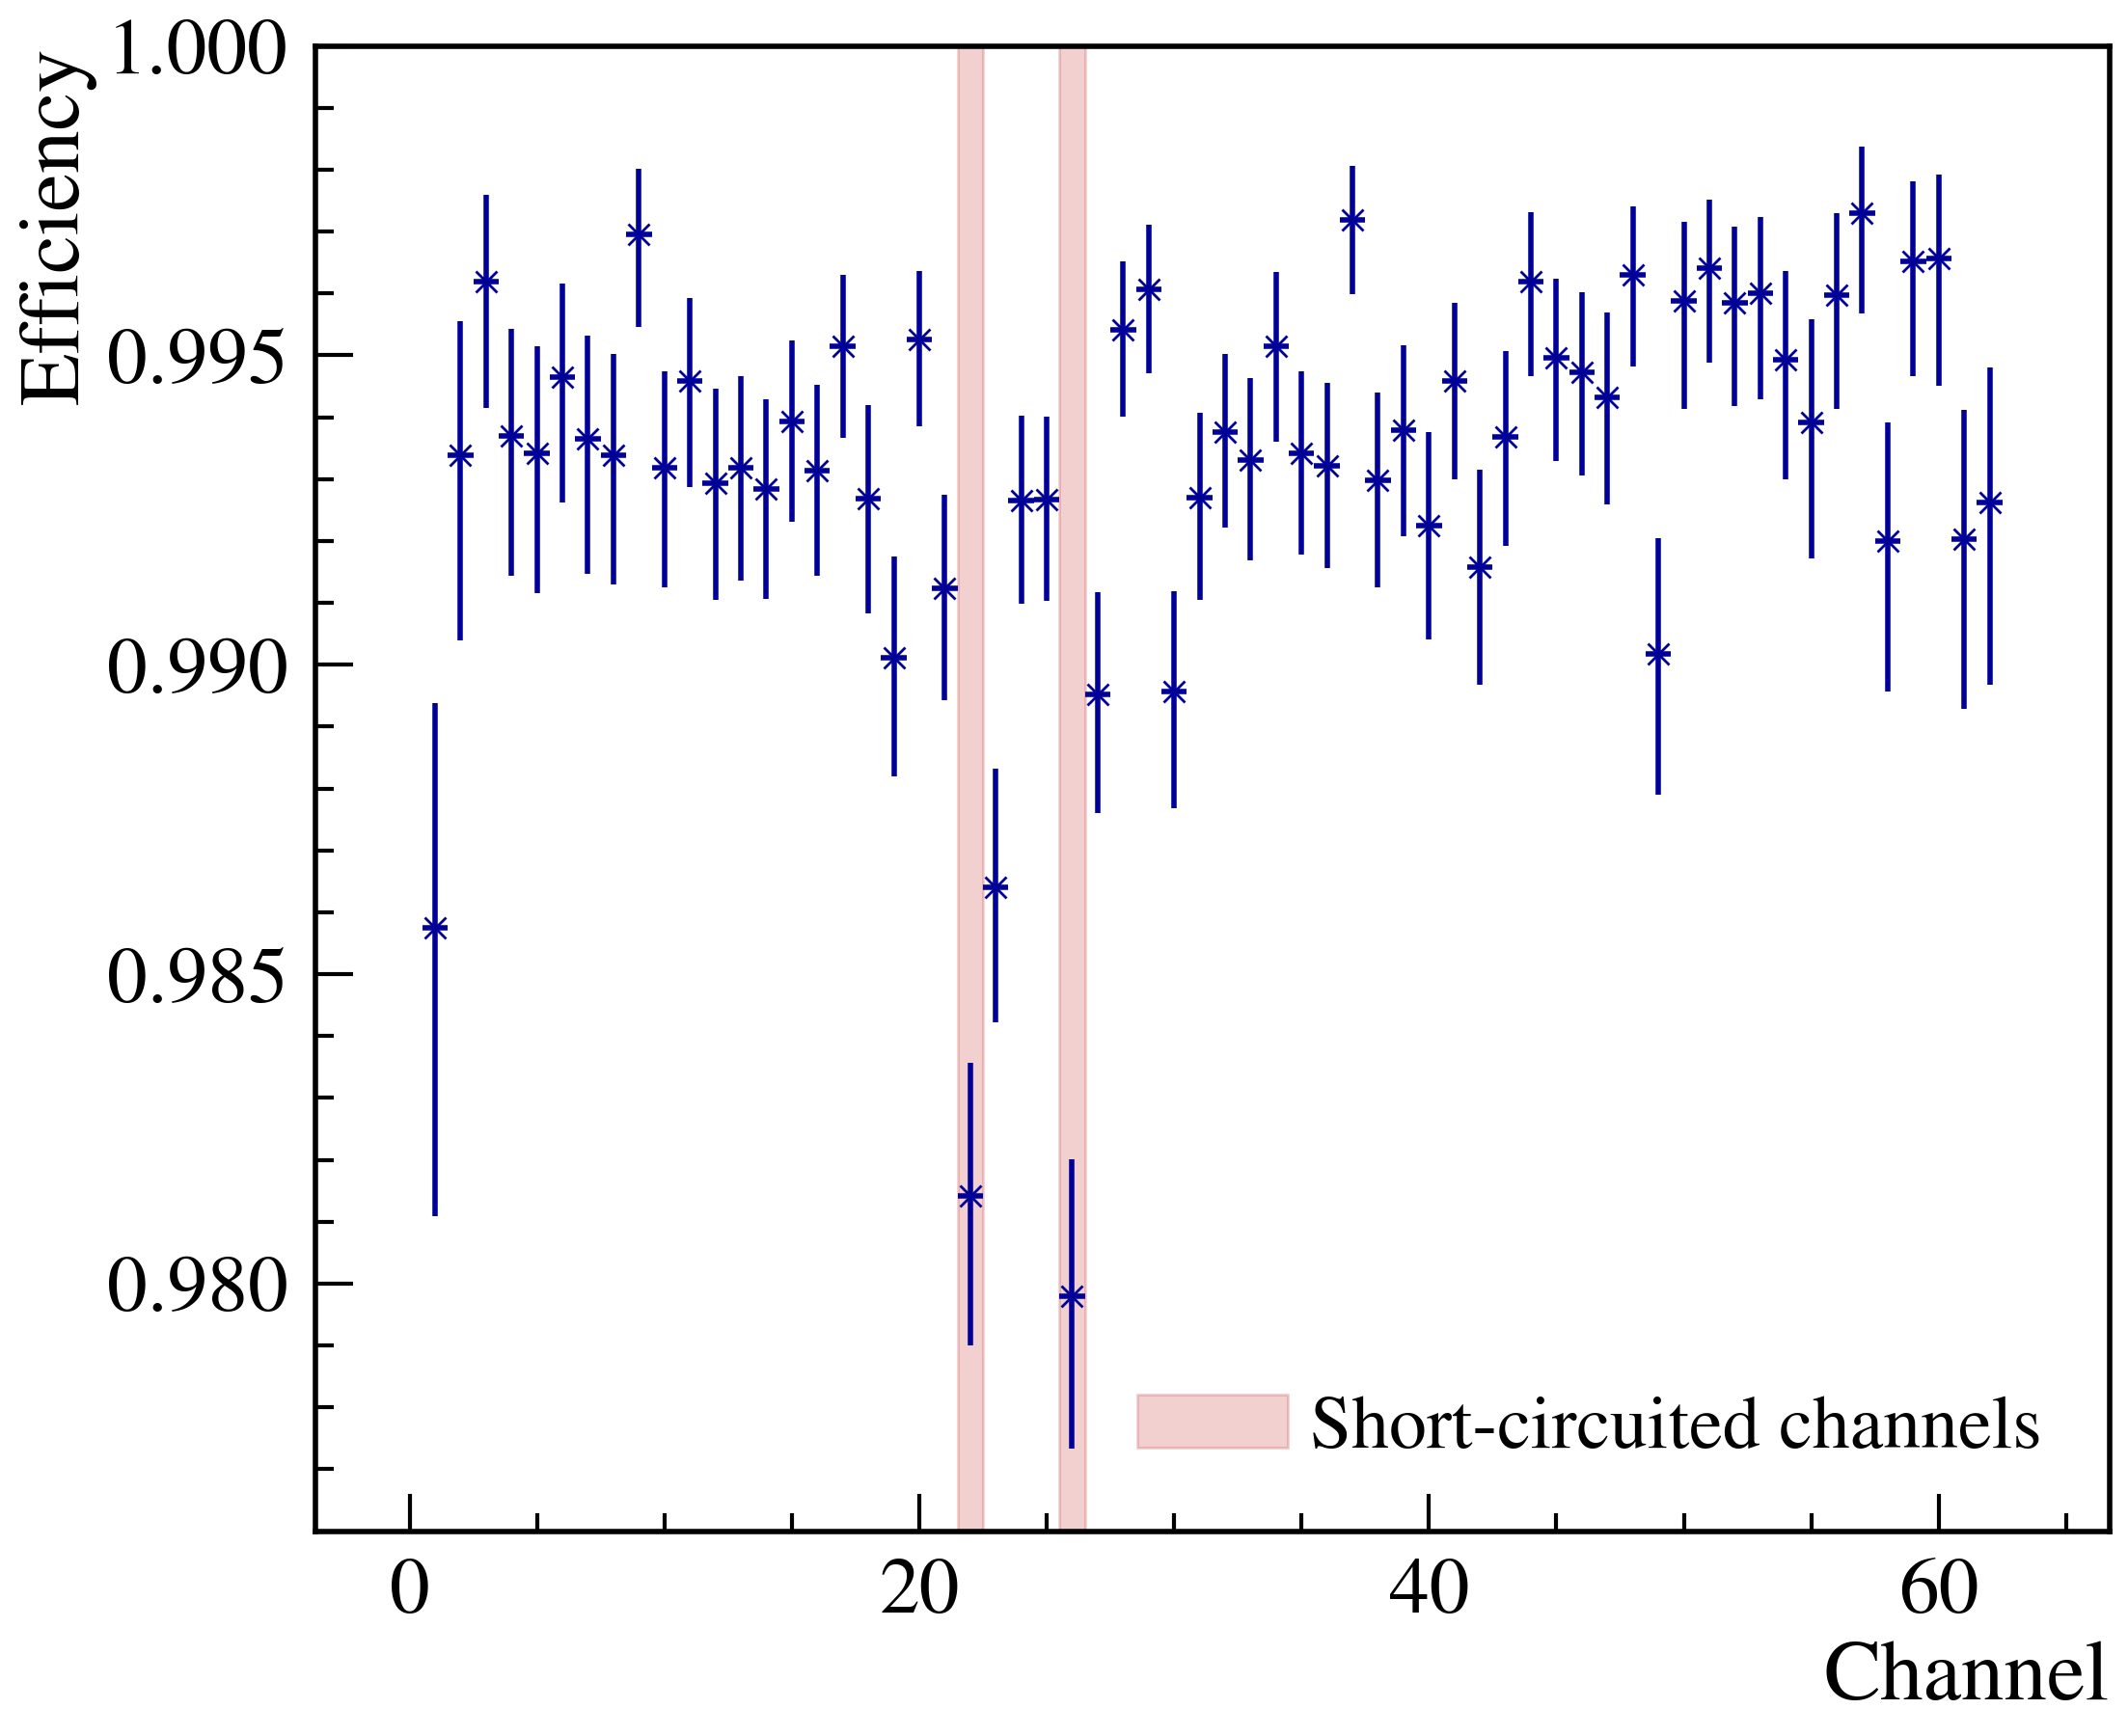

In [52]:
BX_sel = 1
FT_sel = range(12,17)
algo = "Default"

P_unirrad = "Trackhits/PACIFIC/Layer_1/5GeV_000mm_0degree_3V5_moduleSwap_Ths152535_1.nc"
P_irrad = "Trackhits/PACIFIC/Layer_1/5GeV_000mm_0degree_3V5_Ths152535_1.nc"
S_unirrad = "Trackhits/SPIROC/Layer_1/5GeV_000mm_0degree_3V5_moduleSwap_1_ThS152535.nc"
S_irrad = "Trackhits/SPIROC/Layer_1/5GeV_000mm_0degree_3V5_1_ThS152535.nc"


dpl.subplots(figsize=(12,10))
for i, P in enumerate([P_unirrad, P_irrad]):
    with xr.open_dataset(P, algo) as ds:
        ds_sel = ds.sel(BX=BX_sel, FT=FT_sel)
        ds_sel_sum = ds_sel.sum(["Run_num", "FT"])
        eff, errlow, errup = TB.calc_TEfficiency(ds_sel_sum["Trackhits_found"], 
                                                 ds_sel_sum["Trackhits_total"])
        chs = ds_sel_sum["Ch"]
        
        label = "PACIFIC "
        label += "unirradiated" if i == 0 else "irradiated"
        label = ""
        dpl.errorbar(chs, eff, xerr=0.5, yerr=[errlow, errup], fmt="x", ms=8, label=label)
        
    break
        
for i, S in enumerate([S_unirrad, S_irrad]):
    break
    with xr.open_dataset(S, algo) as ds:
        ds_sel_sum = ds.sum(["Run_num", "FT", "BX"])
        eff, errlow, errup = TB.calc_TEfficiency(ds_sel_sum["Trackhits_found"], 
                                                 ds_sel_sum["Trackhits_total"])
        chs = ds_sel_sum["Ch"]-320
        
        label = "SPIROC "
        label += "unirradiated" if i == 0 else "irradiated"
        dpl.errorbar(chs, eff, xerr=0.5, yerr=[errlow, errup], fmt="^", ms=8, label=label)        
        
#plt.grid(ls="--")
plt.ylim(0.976, 1)
#plt.xlim(-0.5, 63.5)
for idx, shortchannel in enumerate([22, 26]):
    label = "Short-circuited channels" if idx == 0 else ""
    plt.axvspan(shortchannel-0.5, shortchannel+0.5, color="gcred", alpha=0.2, label=label)
#plt.legend(fontsize=22, frameon=True, edgecolor="k", framealpha=1, fancybox=False, loc="lower right")
#plt.axhline(1, color="k")
plt.legend(loc="lower right")
dpl.xlabel("Channel")
dpl.ylabel("Efficiency")
plt.show()